<a href="https://colab.research.google.com/github/SUSHOVAN95/ML_Projects/blob/main/CatandDogTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2

In [ ]:
import tensorflow as tf
_URL = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

824901632/824894548 [==============================] - 5s 0us/step


In [ ]:
zip_dir

'/root/.keras/datasets/cats_and_dogs.zip'

In [ ]:
!unzip /root/.keras/datasets/cats_and_dogs.zip

In [ ]:
!ls

'MSR-LA - 3467.docx'   PetImages  'readme[1].txt'   sample_data


In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
IMG_SIZE = 224
INIT_LR = 1e-4
BS = 16

In [ ]:
EPOCHS = 20

In [ ]:
train = ImageDataGenerator(
rescale = 1./255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
rotation_range=40, # Degree range for random rotations
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split=0.2)

In [ ]:
dest = '/content/PetImages'

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

In [ ]:
path = Path('/content/PetImages/Cat').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/content/PetImages/Cat/666.jpg


In [ ]:
import os
try: 
    os.remove("/content/PetImages/Cat/666.jpg")
    print("removed")
except:
  print("can't remove") 
  pass

removed


In [ ]:
path = Path('/content/PetImages/Dog').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

/content/PetImages/Dog/11702.jpg


In [ ]:
import os
try: 
    os.remove("/content/PetImages/Dog/11702.jpg")
    print("removed")
except:
  print("can't remove") 
  pass

removed


In [ ]:
trainset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "training",
class_mode='categorical')


Found 20000 images belonging to 2 classes.


In [ ]:
validset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "validation",
class_mode='categorical')

Found 4998 images belonging to 2 classes.


In [ ]:
NUM_CLASSES = 2

In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(IMG_SIZE,IMG_SIZE, 3)))


# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False


# compile our model
print("[INFO] compiling model...")
opt = SGD(learning_rate=INIT_LR,momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")

[INFO] compiling model...
[INFO] training head...


In [ ]:
H = model.fit_generator(
	trainset,
  validation_data = validset,
	epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1179/1250 [===========================>..] - ETA: 14s - loss: 0.5591 - accuracy: 0.7528

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1250/1250 [==============================] - 307s 246ms/step - loss: 0.5493 - accuracy: 0.7577 - val_loss: 0.3296 - val_accuracy: 0.8752
Epoch 2/20
1250/1250 [==============================] - 306s 244ms/step - loss: 0.3510 - accuracy: 0.8587 - val_loss: 0.2697 - val_accuracy: 0.8930
Epoch 3/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.3064 - accuracy: 0.8787 - val_loss: 0.2439 - val_accuracy: 0.9028
Epoch 4/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.2870 - accuracy: 0.8814 - val_loss: 0.2248 - val_accuracy: 0.9112
Epoch 5/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.2684 - accuracy: 0.8917 - val_loss: 0.2188 - val_accuracy: 0.9138
Epoch 6/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.2559 - accuracy: 0.8954 - val_loss: 0.2117 - val_accuracy: 0.9120
Epoch 7/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.2434 - accuracy: 0.9036 - val_loss: 0.205

In [ ]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('cat_dog', save_format="h5")

[INFO] saving mask detector model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


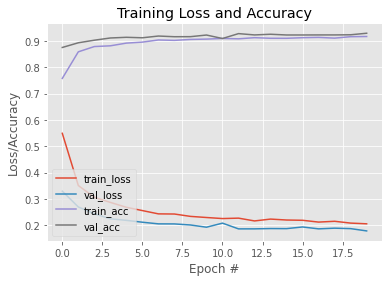

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig('graph.png')

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
from tensorflow import keras
model = tf.keras.models.load_model('/content/cat_dog')

In [10]:
y = ['cat','dog']

In [26]:
from PIL import Image
def predimage(path):
    image = Image.open(path)
    plt.imshow(image)
    test = load_img(path,target_size=(224,224))
    test = img_to_array(test)
    test = np.expand_dims(test,axis=0)
    test /= 255
    result = model.predict(test,batch_size = 16)
    y_class = result.argmax(axis=-1)
    result = (result*100)
    result = list(np.around(np.array(result),2))
    print(result)
    print(y[y_class[0]])

[array([  0., 100.], dtype=float32)]
dog


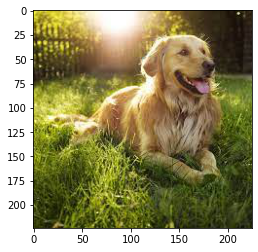

In [27]:
predimage('/content/dog.jpeg')

[array([100.,   0.], dtype=float32)]
cat


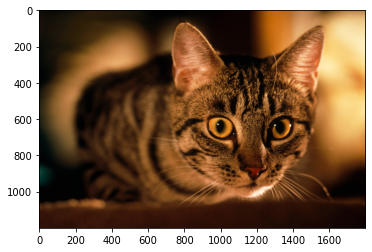

In [28]:
predimage('/content/cat.jpg')